# Ejercicio clase 3: SGD implementando PyTorch
Se resuelve el ejercicio 2 de la clase 2 empleando PyTorch. Se cuenta con un dataset sintético conformado a partir de la función,

$$ y = -(x-2)^2 + 3 + 0.2\sin(16x) $$

Y se pretende encontrar  un polinomio predictor de segundo grado, cuyos parámetros iniciales son elegidos al azar,

$$ \hat{y} = x^2w_1 + xw_2 + w_3 $$

## Librerías necesarias

In [35]:
import numpy as np
import torch
from torch.utils.data import DataLoader
import torch.optim as optim

from matplotlib import pyplot as plt

torch.set_printoptions(edgeitems=2, linewidth=75)



## Construcción de dataset y funciones
A continuación se comienza con la resolución del problema. Se arma un dataset sintético con $n=100000$ muestras

In [27]:
n = 100000
X = torch.linspace(-3, 7, n).view(-1, 1)
y = -(X-2)**2 + 3 + 0.2*torch.sin(16*X).view(-1,1) 

Se muestra el gráfico de la función para visualizar que se busca predecir con el polinomio de segundo grado

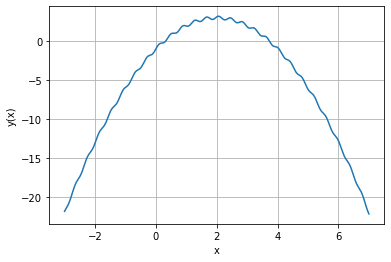

In [28]:
plt.plot(X,y)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid(True)